In this article, I will show the necessary steps using Python to find Spearman's rank correlation coefficient.

Spearman's rank correlation uses ordinal data. Examples of ordinal data are:

- 1st, 2nd, 3rd, 
- Small, Medium, Large, XL,
- Strongly agree, Agree, Neutral, Disagree, Strongly Disagree
- Very often, Often, Not Often, Not at all

Spearman's rank correlation coefficient, $r_s$ shows the correlation between two ordinal data how one ordinal data increases or decreases as the other ordinal increases which are described as "monotonic". 

$$r_s=1-\frac{6\sum d^2}{n(n^2-1)}$$

This formla is an alternative to Pearson's correlation if the the data are ordinal and monotonic and if there are no ties in data.

A value of 1 means the set of data is strictly increasing and the value of -1 means it is strictly decreasing. A value of 0 means that data shows no monotonic behavior. the Spearman correlation between two variables will be high when an observation has a similar rank between the two variables.

You can find all the code from this [link](https://github.com/shinokada/python-for-ib-diploma-mathematics/blob/master/Spearman's%20rank%20correlation%20coefficient.ipynb).

Let's start.

We need to import necessary libraries.

In [2]:
# https://gist.github.com/shinokada/574f639d4f07ed1388abd8f24f6936a4

from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import spearmanr

# Example of the Spearman's Rank Correlation Test using two sets of list.

Let's find how the correlation of the rank at 5km relate to the rank of 10km run.

In [3]:
# https://gist.github.com/shinokada/62fc538f01252f765bdf789a0efa80d6

fivekm = [1,2,3,4,5,6,7]
tenkm=[3,2,1,5,7,4,6]
rs, pval = spearmanr(fivekm, tenkm)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
if pval < 0.05:
	print('At 5% level of significance, the final rankings is significant or dependent')
else:
	print('At 5% level of significance, the final rankings is not significant or independent')

rs=0.678571, p-value=0.093750
At 5% level of significance, the final rankings is not significant or independent


p-value is the level of significance. It determines the probability that the correlation happened by chance.


# Example using Pandas dataframe.

In [4]:
# https://gist.github.com/shinokada/83b2d7cd47e4fc1993d50400570e1b36

race = pd.DataFrame(
    [
        [1,3],
        [2,2],
        [3,1],
        [4,5],
        [5,7],
        [6,4],
        [7,6]
    ],
    columns=["After 5km","End of race"])
race

,After 5km,End of race
0,1,3
1,2,2
2,3,1
3,4,5
4,5,7
5,6,4
6,7,6


## Ploting data

Let's plot this data using Pandas plot().

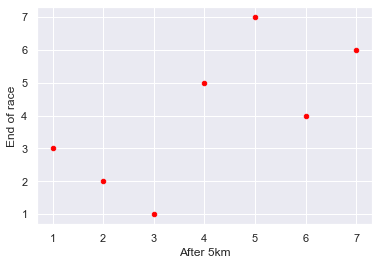

In [5]:
# https://gist.github.com/shinokada/e491ca766909d2627f254bc55f6b1bf9

race.plot.scatter(x='After 5km',y='End of race',c='red')

We can plot using Seaborn to add color.

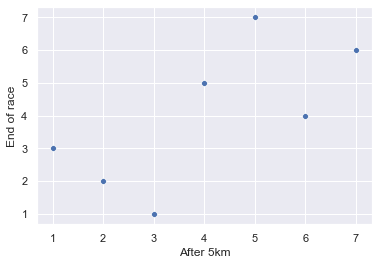

In [6]:
# https://gist.github.com/shinokada/6582b922f8a11af08f1fbe6af84f076f

sns.scatterplot(x='After 5km',y='End of race',data=race)

We find $r_s$ and p-value from pandas dataframe.

In [7]:
# https://gist.github.com/shinokada/cc6039ce789f594a134b644ce9afebcd 

rs, pval = spearmanr(race)
print('rs=%.6f, p-value=%.6f' % (rs, pval))

rs=0.678571, p-value=0.093750


Now we create another dataframe using Pandas. Using `spearmanr`, you don't need to change your raw data to the ordinal data. 

   Set of A  Set of B
0         3         4
1         5         4
2         6         2
3         6         4
4         8         9
5        11         7
rs=0.585239, p-value=0.222365


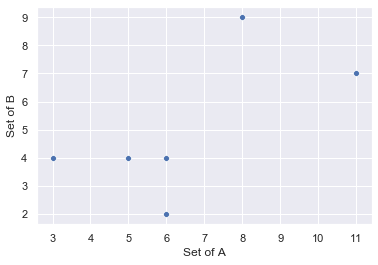

In [8]:
# https://gist.github.com/shinokada/2a67199e68bc08535d6eb278fde199ac

rawdata = pd.DataFrame(
    [
        [3,4],
        [5,4],
        [6,2],
        [6,4],
        [8,9],
        [11,7]
    ],
    columns=['Set of A','Set of B'])
print(rawdata)
rs, pval = spearmanr(rawdata)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='Set of A',y='Set of B',data=rawdata)

Manually rank the above data to the ordinal data. Finding the $r_s$ and p-value. This shows the exactly the same result as finding them from the raw data.

   Ranking of A  Ranking of B
0           1.0             3
1           2.0             3
2           3.5             1
3           3.5             3
4           5.0             6
5           6.0             5
rs=0.585239, p-value=0.222365


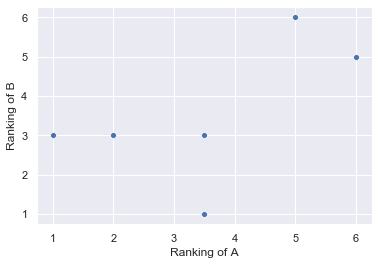

In [9]:
# https://gist.github.com/shinokada/768b2b6f1c2bce8790c6ccf68187e0e9

ordinaldata = pd.DataFrame(
    [
        [1.0,3],
        [2.0,3],
        [3.5,1],
        [3.5,3],
        [5.0,6],
        [6.0,5]
    ],
    columns=['Ranking of A','Ranking of B'])
print(ordinaldata)
rs, pval = spearmanr(ordinaldata)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='Ranking of A',y='Ranking of B',data=ordinaldata)

A value of 1 means the set of data is strictly increasing. The rank do not change. p-value is 0 in this case.

rs=1.000000, p-value=0.000000


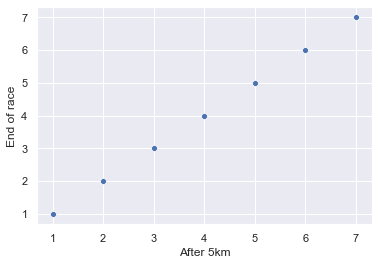

In [10]:
# https://gist.github.com/shinokada/318d5d1eb9a7981f003447ee19adaca6

race2 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,5],
        [6,6],
        [7,7]
    ],
    columns=['After 5km','End of race'])
rs, pval = spearmanr(race2)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='After 5km',y='End of race',data=race2)

The value of -1 means it is strictly decreasing. The rank is in a reversal order.

rs=-1.000000, p-value=0.000000


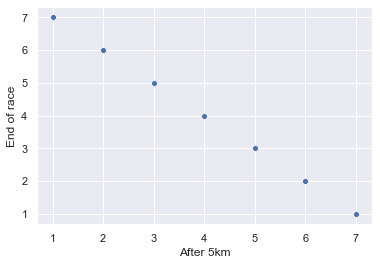

In [11]:
# https://gist.github.com/shinokada/817f920c45bd3f983ca9bd6ed2dd1838

race3 = pd.DataFrame(
    [
        [1,7],
        [2,6],
        [3,5],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=['After 5km','End of race'])
rs, pval = spearmanr(race3)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='After 5km',y='End of race',data=race3)

No monotonic behavior gives the value of 0.

rs=0.000000, p-value=1.000000


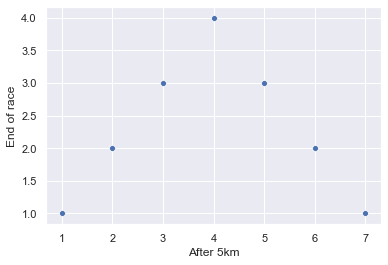

In [12]:
# https://gist.github.com/shinokada/3c5f78acda90a402288d75b8c795953b

race4 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=['After 5km','End of race'])
rs, pval = spearmanr(race4)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
sns.scatterplot(x='After 5km',y='End of race',data=race4)

# Importing a CSV file

In [16]:
rides = pd.read_csv('https://raw.githubusercontent.com/shinokada/python-for-ib-diploma-mathematics/master/Data/OD_2019.csv')
print(rides.shape)
print(rides.head())

(99, 6)
            start_date  start_station_code             end_date  \
0  2019-10-01 00:00:08                6174  2019-10-01 00:03:28   
1  2019-10-01 00:01:13                6196  2019-10-01 00:04:38   
2  2019-10-01 00:01:34                6033  2019-10-01 00:05:07   
3  2019-10-01 00:02:33                6136  2019-10-01 00:06:50   
4  2019-10-01 00:02:34                6204  2019-10-01 00:04:18   

   end_station_code  duration_sec  is_member  
0              6175           199          1  
1              6196           205          1  
2              6723           212          1  
3              6165           256          1  
4              6079           104          1  


In [14]:


to_df = (
    rides
        .loc[:, ['end_station_code', 'duration_sec']]
        .groupby('end_station_code')
        .sum()
        .assign(n_rides=rides['end_station_code'].value_counts())
)
print(to_df.head())

my_df = (
    rides
        .loc[:, ['end_station_code', 'duration_sec']]
        .groupby('end_station_code')
        .sum()
)
print(my_df.head())

                  duration_sec  n_rides
end_station_code                       
6015                       863        1
6018                       276        1
6029                      3085        2
6043                       761        1
6052                       596        1
                  duration_sec
end_station_code              
6015                       863
6018                       276
6029                      3085
6043                       761
6052                       596


# Examples to use Spearman's correlation are:

- [IQ of a person with the number of hours spent on games](https://www.wikiwand.com/en/Spearman%27s_rank_correlation_coefficient)
- [Physics and Math ranks](https://www.statisticshowto.datasciencecentral.com/spearman-rank-correlation-definition-calculate/)
- [Free university meals and their CGPA scores](https://www.toppr.com/guides/business-mathematics-and-statistics/correlation-and-regression/rank-correlation/)

You can use [the null hypothesis for this test](https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php). 

# Reference

- To compare the Spearman correlation and the Pearson correlation, please read [A comparison of the Pearson and Spearman correlation here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) 

- 

-

-


